In [12]:

#pregunta 1
#importar la libreria en pandas( pandas ayuda en facilitar el analisis y la manipulacion de datos de tablas y de estructuras) 
import pandas as pd 

#cargar el archivo csv a un dataframe el pd.read es una biblioteca de Pandas que se utiliza para leer datos de diferentes archivos y luego los convierte en data frames de pandas. 
df = pd.read_csv('Felicidad y GDP.csv')

df_felicidad = df.sort_values(by='Felicidad', ascending=False)

#aqui va a imprimir las primeras 10 filas de la informacion
print("Paises mas felices: ")
print(df_felicidad[['Pais', 'Felicidad']].head(10))

df_gdp = df.sort_values(by='GDP', ascending=False)

print("Paises con mayor GDP")
                        
print(df_gdp[['Pais', 'GDP']].head(10))


Paises mas felices: 
          Pais  Felicidad
0      Finland     7.8210
1      Denmark     7.6362
2      Iceland     7.5575
3  Switzerland     7.5116
4  Netherlands     7.4149
5   Luxembourg     7.4040
6       Sweden     7.3843
7       Norway     7.3651
8       Israel     7.3638
9  New Zealand     7.1998
Paises con mayor GDP
               Pais           GDP
15    United States  2.089370e+13
70            China  1.468770e+13
52            Japan  5.040110e+12
13          Germany  3.846410e+12
16   United Kingdom  2.756900e+12
130           India  2.667690e+12
19           France  2.630320e+12
29            Italy  1.892570e+12
14           Canada  1.645420e+12
57      South Korea  1.637900e+12


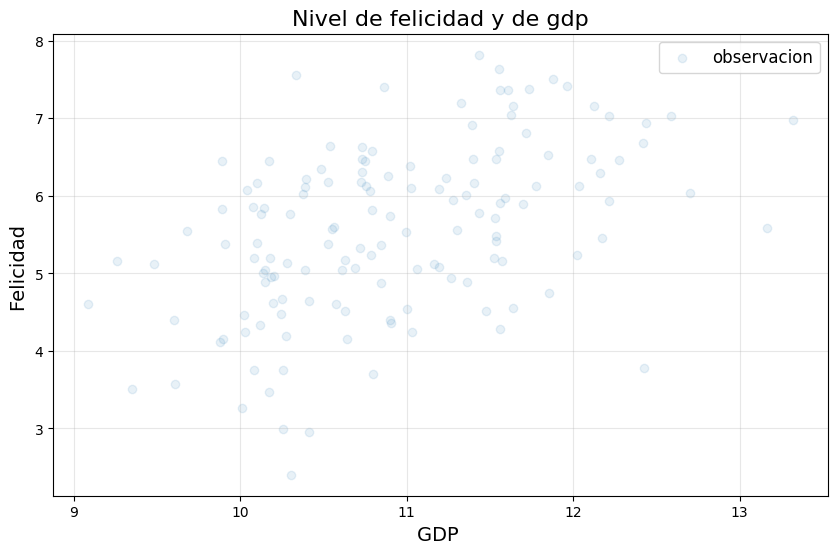

In [13]:

#pregunta 2
import numpy as np
import matplotlib.pyplot as plt

#CALCULAR EL LOG BASE 10 PARA EL GDP
df['Log10_GDP'] = np.log10(df['GDP'])

plt.figure(figsize=(10,6))
plt.scatter(
    df['Log10_GDP'],
    df['Felicidad'],
    alpha=0.1,
    label='observacion'
)

plt.title('Nivel de felicidad y de gdp', fontsize=16)
plt.xlabel('GDP ', fontsize=14)
plt.ylabel('Felicidad ', fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)

plt.show()

In [14]:
#pregunta 3
import numpy as np

x = np.array([1.0,2.0,3.0,4.0,5.0]) #variable independiente para log10
y = np.array([2.1,2.4,2.8,3.5,4.0]) #variable dependiente de felicidad

mean_x = np.mean(x)
mean_y = np.mean(y)

numerador = np.sum((x-mean_x)*(y-mean_y))
denominador = np.sum((x-mean_x)**2) 

b1 = numerador / denominador 
b0 = mean_y - b1 * mean_x


print("b1 = ", b1)
print("b0 = ", b0)

b1 =  0.49000000000000005
b0 =  1.4899999999999998


RSS =  0.051000000000000094


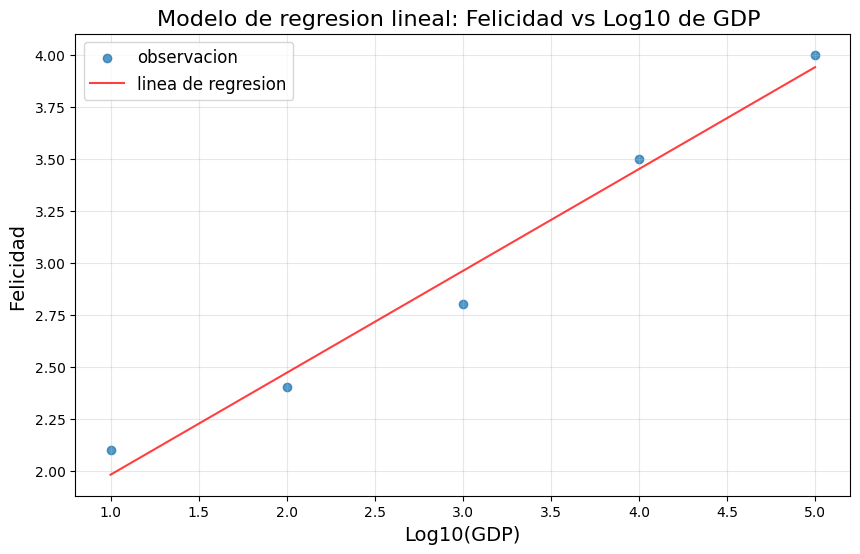

In [18]:

# pregunta 4 y 5 

y_pred = b0 + b1 * x

RSS = np.sum((y - y_pred)**2)
print("RSS = ", RSS)

plt.figure(figsize=(10,6))
plt.scatter(
    x,
    y,
    alpha=0.75,
    label='observacion'
)

#linea de regresion 
plt.plot(
    x,
    y_pred,
    color="red",
    alpha = 0.75,
    label="linea de regresion"
)

plt.title('Modelo de regresion lineal: Felicidad vs Log10 de GDP ', fontsize=16)
plt.xlabel('Log10(GDP)', fontsize=14)
plt.ylabel('Felicidad ', fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)

plt.show()

In [19]:

#PREGUNTA 6
from scipy.stats import t
#ERROR ESTANDAR PARA B1 USANDO LA FORULA SE
n = len(x)
SE_B1 = np.sqrt(RSS/((n-2)*denominador))
print ("SE de B1 = ", SE_B1)

#Intervalo de confianza para b1

alpha = 0.05
t_crit = t.ppf(1-alpha/2,df=n - 2) # esto va a dar el valor critico de t para un nivel de confianza del 95%
IC_low = b1 - t_crit * SE_B1
IC_high = b1 + t_crit * SE_B1

print(f"IC de B1: ({IC_low}, {IC_high})")

if IC_low > 0 or IC_high < 0:
    print("La asociacion entre la felicidad y el logaritmo del GDP es significativa.")
else:
    print("La asociacion entre la felicidad y el logaritmo del GDP NO es significativa.")

# USANDO ESTADISTICO T
t_stat = b1/(SE_B1)

print("Prueba de hipotesis usando ESTADISTICO T : ", t_stat)
print("Valor critico de t = ", t_crit)

if abs(t_stat) > t_crit:
    print("La asociacion entre la felicidad y el logaritmo del GDP es significativa.")
    print("Evidencia: ", t_stat, ">", t_crit)
else:
    print("La asociacion entre la felicidad y el logaritmo del GDP NO es significativa.")
    print("Evidencia: ", t_stat, "<", t_crit)

SE de B1 =  0.041231056256176644
IC de B1: (0.3587843773545631, 0.6212156226454371)
La asociacion entre la felicidad y el logaritmo del GDP es significativa.
Prueba de hipotesis usando ESTADISTICO T :  11.884245626780306
Valor critico de t =  3.182446305284263
La asociacion entre la felicidad y el logaritmo del GDP es significativa.
Evidencia:  11.884245626780306 > 3.182446305284263


In [29]:

#PREGUNTA 7
from scipy.stats import t
#PRIMERO EL RESIDUAL STANDARD ERROR (RSE)
n = len(y)

RSE = np.sqrt((1/(n-2))*RSS)
print ("RSE = ", RSE) 


RSE =  0.13038404810405307


In [30]:
#PARA CALCULAR R^2 NECESITAMOS TSS,RSS LO CUAL YA TENEMOS Y ESS 
y_pred = b0 + b1 * x
TSS = np.sum((y-mean_y)**2)
print("TSS = ", TSS)
ESS = np.sum((y_pred - mean_y)**2)
print("ESS = ", ESS)

R_2 = ESS/TSS

print("R^2 = ", R_2)

TSS =  2.452
ESS =  2.4010000000000007
R^2 =  0.9792006525285484


In [31]:

#PREGUNTA 8

import statsmodels.api as sm

X = df['Log10_GDP']
Y = df['Felicidad']

X = sm.add_constant(X)

model = sm.OLS(Y,X).fit()

print(model.summary())

print("P-values mas preciso: ", model.pvalues)

print("Error estantar residual (RSE): ", model.scale**0.5)

                            OLS Regression Results                            
Dep. Variable:              Felicidad   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     39.59
Date:                Sat, 25 Jan 2025   Prob (F-statistic):           3.83e-09
Time:                        19:34:36   Log-Likelihood:                -195.09
No. Observations:                 141   AIC:                             394.2
Df Residuals:                     139   BIC:                             400.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.3024      1.094     -1.191      0.2